In [ ]:
# https://towardsdatascience.com/multi-class-text-classification-with-lstm-1590bee1bd17

In [1]:
import pandas as pd
import numpy as np

In [8]:
d1 = pd.read_csv('Suicide_Detection.csv')
d2 = pd.read_csv('sentiment_tweets3.csv')

In [9]:
d1

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
35484,53214,Running out of time.(M 22) I have one week to ...,suicide
35485,53215,I've been alone all along.I've always had suic...,suicide
35486,53218,"I'm worried about my roommate, I think he's su...",suicide
35487,53219,I don't know what to do anymoreI feel stuck. T...,suicide


In [10]:
d1 = d1.dropna()

In [17]:
d1

,Unnamed: 0,text,class,Depressed
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,0
1,3,Am I weird I don't get affected by compliments...,non-suicide,0
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,0
3,8,i need helpjust help me im crying so hard,suicide,0
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,0
...,...,...,...,...
35483,53212,Thank you. In these times of covid and whatnot...,non-suicide,0
35484,53214,Running out of time.(M 22) I have one week to ...,suicide,0
35485,53215,I've been alone all along.I've always had suic...,suicide,0
35486,53218,"I'm worried about my roommate, I think he's su...",suicide,0


In [19]:
# Changing suicide = 1 & not suicide = 0
d1['Depressed'] = 0
for i in range(len(d1)):
  if(d1.loc[i,'class'] == 'suicide'):
    d1.loc[i,'Depressed'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [20]:
d1

,Unnamed: 0,text,class,Depressed
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,1
1,3,Am I weird I don't get affected by compliments...,non-suicide,0
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,0
3,8,i need helpjust help me im crying so hard,suicide,1
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,1
...,...,...,...,...
35483,53212,Thank you. In these times of covid and whatnot...,non-suicide,0
35484,53214,Running out of time.(M 22) I have one week to ...,suicide,1
35485,53215,I've been alone all along.I've always had suic...,suicide,1
35486,53218,"I'm worried about my roommate, I think he's su...",suicide,1


In [25]:
d2 = pd.read_csv('sentiment_tweets3.csv')

In [26]:
d2

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [29]:
d2 = d2.rename(columns={'label (depression result)':'Depressed'})

In [30]:
d2 = d2.rename(columns={'message to examine': 'body'})

In [31]:
d2

,Index,body,Depressed
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [32]:
d1

,Unnamed: 0,text,class,Depressed
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,1
1,3,Am I weird I don't get affected by compliments...,non-suicide,0
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,0
3,8,i need helpjust help me im crying so hard,suicide,1
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,1
...,...,...,...,...
35483,53212,Thank you. In these times of covid and whatnot...,non-suicide,0
35484,53214,Running out of time.(M 22) I have one week to ...,suicide,1
35485,53215,I've been alone all along.I've always had suic...,suicide,1
35486,53218,"I'm worried about my roommate, I think he's su...",suicide,1


In [34]:
d1 = d1.rename(columns={'text':'body'})

In [35]:
d1

,Unnamed: 0,body,class,Depressed
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,1
1,3,Am I weird I don't get affected by compliments...,non-suicide,0
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,0
3,8,i need helpjust help me im crying so hard,suicide,1
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,1
...,...,...,...,...
35483,53212,Thank you. In these times of covid and whatnot...,non-suicide,0
35484,53214,Running out of time.(M 22) I have one week to ...,suicide,1
35485,53215,I've been alone all along.I've always had suic...,suicide,1
35486,53218,"I'm worried about my roommate, I think he's su...",suicide,1


In [37]:
d3 = pd.read_csv('Data.csv')
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1912 entries, 0 to 1911
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1912 non-null   object 
 1   score         1912 non-null   int64  
 2   id            1912 non-null   object 
 3   subreddit     1912 non-null   object 
 4   url           1912 non-null   object 
 5   num_comments  1912 non-null   int64  
 6   body          1912 non-null   object 
 7   created       1912 non-null   float64
 8   Depressed     1912 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 134.6+ KB


In [38]:
d3.Depressed.value_counts()

0    996
1    916
Name: Depressed, dtype: int64

In [39]:
d1 = d1[['body','Depressed']]
d2 = d2[['body','Depressed']]
d3 = d3[['body','Depressed']]

In [41]:
df = pd.concat([d1,d2,d3])

In [42]:
df

,body,Depressed
0,Ex Wife Threatening SuicideRecently I left my ...,1
1,Am I weird I don't get affected by compliments...,0
2,Finally 2020 is almost over... So I can never ...,0
3,i need helpjust help me im crying so hard,1
4,"I’m so lostHello, my name is Adam (16) and I’v...",1
...,...,...
1907,What's something you do when noone is looking?,0
1908,If you had to eat one type of canned food for ...,0
1909,"People of Reddit, what do you think of virtue ...",0
1910,Who or what do you trust the most?,0


In [44]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [45]:
import re
from nltk.corpus import stopwords
df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['body'] = df['body'].apply(clean_text)
df['body'] = df['body'].str.replace('\d+', '')

In [46]:
df

,body,Depressed
0,e wife threatening suiciderecently left wife g...,1
1,weird dont get affected compliments coming som...,0
2,finally almost never hear bad year ever swea...,0
3,need helpjust help im crying hard,1
4,im losthello name adam ive struggling years i...,1
...,...,...
47709,whats something noone looking,0
47710,eat one type canned food rest life choosing,0
47711,people reddit think virtue signalling fau outr...,0
47712,trust,0


In [47]:
from keras.preprocessing.text import Tokenizer
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['body'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 92220 unique tokens.


In [48]:
from keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(df['body'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (47714, 250)


In [49]:
Y = pd.get_dummies(df['Depressed']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (47714, 2)


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(42942, 250) (42942, 2)
(4772, 250) (4772, 2)


In [59]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 3
batch_size = 512

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/3
76/76 [==============================] - 280s 4s/step - loss: 0.5282 - accuracy: 0.7002 - val_loss: 0.2222 - val_accuracy: 0.9132
Epoch 2/3
76/76 [==============================] - 271s 4s/step - loss: 0.1694 - accuracy: 0.9404 - val_loss: 0.1839 - val_accuracy: 0.9374
Epoch 3/3
76/76 [==============================] - 270s 4s/step - loss: 0.1154 - accuracy: 0.9625 - val_loss: 0.1811 - val_accuracy: 0.9390


In [60]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

150/150 [==============================] - 10s 65ms/step - loss: 0.1933 - accuracy: 0.9357
Test set
  Loss: 0.193
  Accuracy: 0.936


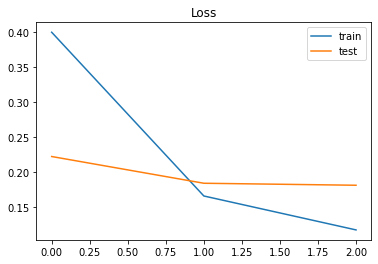

In [61]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

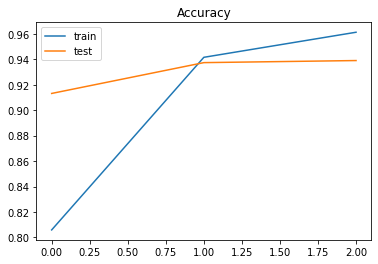

In [62]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();